In [84]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt


In [3]:
## from a kaggle dataset, containig CTG's observations already classidied as healthy, 
# suspicious or pathological by 3 obstetricians.


fetal = pd.read_csv("fetal_health.csv")

fetal.shape

(2126, 22)

In [4]:
fetal.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [51]:
fetal.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [ ]:
####  HYPOTHESIS TESTING   ####

# 1. set the hypothesis
# 2. choose the significance levele
# 3. sample
# 4. compute de statistic
# 5. get p-value
# 6. decide

In [26]:
#### A normal fetal heart rate is between 110-160 bpm.

# 1) H0: HR =< 110bpt is pathological
#    H1: pathological > 110 is pathological 

# 2) significance level: 

alpha = 0.05

In [10]:
# 3) sample = fetal HR and fetal health

hr_sample = fetal[fetal["fetal_health"] == 3]["baseline value"]

hr_sample

# 4) compute statistics

mean_hr = fetal["baseline value"].mean()

mean_hr

133.3038570084666

In [20]:
std_hr = hr_sample.std(ddof=1)

n = len(hr_sample)   

stats = st.ttest_1samp(hr_sample, 110, alternative = "greater")


In [24]:
p_value = stats[1]
p_value

2.995706464965556e-72

In [27]:
if p_value > alpha:
    print("we CAN NOT reject the null hypothesis")
else:
    print("we CAN reject the null hypothesis")


we CAN reject the null hypothesis


In [ ]:
## p value very low, so i have to reject my H0 --> HR lower than 110 does not mean 
# necessarily a pathological situation.

In [ ]:
## do the other extreme os HR means it is pathological?

# 1) H0: HR => 160bpt is pathological
#    H1: pathological < 160

# 2) significance level: 

alpha = 0.05

In [17]:
# 3) sample = fetal HR and fetal health

hr_sample = fetal[fetal["fetal_health"] == 3]["baseline value"]

hr_sample

# 4) compute statistics

mean_hr = fetal["baseline value"].mean()

mean_hr

133.3038570084666

In [29]:
std_hr = hr_sample.std(ddof=1)
 

stats = st.ttest_1samp(hr_sample, 160, alternative = "less")
stats

TtestResult(statistic=-39.818417392733046, pvalue=5.939834580069891e-90, df=175)

In [30]:
p_value = stats[1]
p_value

5.939834580069891e-90

In [31]:
if p_value > alpha:
    print("we CAN NOT reject the null hypothesis")
else:
    print("we CAN reject the null hypothesis")

we CAN reject the null hypothesis


In [ ]:
## p value very low, so i have to reject my H0 --> HR greater than 160 does not mean 
# necessarily a pathological situation.

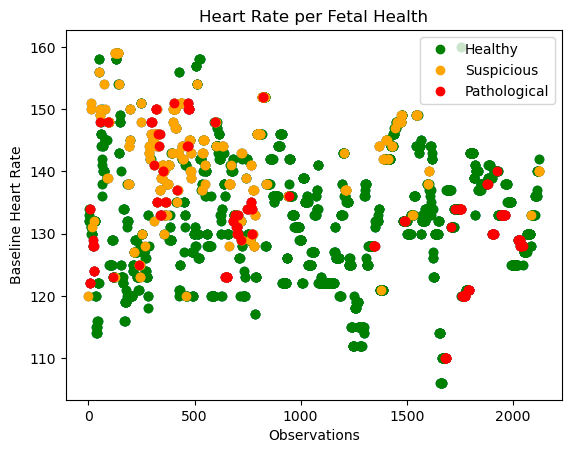

In [100]:

#### looking for HR graphs


plt.plot(fetal["baseline value"], "o")
plt.plot(fetal[fetal["fetal_health"]==1]["baseline value"], "o", color = "green", label= "Healthy")
plt.plot(fetal[fetal["fetal_health"]==2]["baseline value"], "o", color = "orange", label = "Suspicious")
plt.plot(fetal[fetal["fetal_health"]==3]["baseline value"], "o", color = "red", label= "Pathological")
plt.title("Heart Rate per Fetal Health")
plt.xlabel("Observations")
plt.ylabel("Baseline Heart Rate")
plt.legend(loc='upper right')
plt.show()

In [ ]:
# attempt to ise decelarations: ignored


# H0: pathological babies have => 1 prolongued deceraltion
# H1 : patolhogical babies have < 1prolongues decelaration

alpha = 0.05

In [54]:
# 3) sample = prolongues decelartation and fetal health

sev_deceleration_3 = fetal[fetal["fetal_health"] == 3]["severe_decelerations"]

sev_deceleration_3

# 4) compute statistics

mean_sev_dec_3 = fetal["severe_decelerations"].mean()

mean_sev_dec_3

3.292568203198495e-06

In [57]:
std_sev_dec_3 = sev_deceleration_3.std(ddof=1)
 

stats = st.ttest_1samp(sev_deceleration_3, 1, alternative = "less")
stats

TtestResult(statistic=-72898.19927238849, pvalue=0.0, df=175)

In [59]:
p_value = stats[1]
p_value

0.0

In [60]:
if p_value > alpha:
    print("we CAN NOT reject the null hypothesis")
else:
    print("we CAN reject the null hypothesis")

we CAN reject the null hypothesis


In [32]:
fetal

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [110]:

## 3

### finding confidence interval for variability amongst healthy babies


variability_healthy_1 = fetal[fetal["fetal_health"]== 1]["histogram_variance"]

variability_healthy_1

1       12.0
2       13.0
3       13.0
4       11.0
12       7.0
        ... 
2117     1.0
2118     2.0
2119     1.0
2120     2.0
2125     1.0
Name: histogram_variance, Length: 1655, dtype: float64

In [111]:
## what is variability of healthy babies??

std_variability_1 = variability_healthy_1.std(ddof=1)

mean_variability_1 = variability_healthy_1.mean()

n_1 = len(variability_healthy_1)

variability_interval_1 = st.t.interval(0.98, n_1-1, loc = mean_variability_1, scale = std_variability_1/np.sqrt(n_1))
variability_interval_1



## with 98% confidence, healthy babies HR variability is between 16 and 18,7, which is 
# in accordance with the guidelines, that say between 5 - 25

(16.20355269754065, 18.755963918773546)

In [108]:

### finding confidence interval for variability amongst suspicious babies

variability_susp_2 = fetal[fetal["fetal_health"]== 2]["histogram_variance"]

variability_susp_2

0       73.0
10       9.0
11      10.0
17      45.0
28      73.0
        ... 
2086     1.0
2121     2.0
2122     3.0
2123     4.0
2124     4.0
Name: histogram_variance, Length: 295, dtype: float64

In [109]:
## what is variability of HR these babies??

std_variability_2 = variability_susp_2.std(ddof=1)

mean_variability_2 = variability_susp_2.mean()

n_2 = len(variability_susp_2)

variability_interval_2 = st.t.interval(0.98, n_2-1, loc = mean_variability_2, scale = std_variability_2/np.sqrt(n_2))
variability_interval_2


## with 98% confidence, babies with a suspicion of abnormality have HR variability
# between 4,7 and 9,6, which is on low end of the narmal range 


(4.728096026538621, 9.699022617529176)

In [112]:
## What about pathological??? 


variability_sick_3 = fetal[fetal["fetal_health"]== 3]["histogram_variance"]

variability_sick_3


5       170.0
6       215.0
7         3.0
8         3.0
9         1.0
        ...  
2036     28.0
2037     21.0
2038     28.0
2039     25.0
2048    128.0
Name: histogram_variance, Length: 176, dtype: float64

In [113]:
## what is variability of these babies??

std_variability_3 = variability_sick_3.std(ddof=1)

mean_variability_3 = variability_sick_3.mean()

n_3 = len(variability_sick_3)

variability_interval_3 = st.t.interval(0.98, n_3-1, loc = mean_variability_3, scale = std_variability_3/np.sqrt(n_3))
variability_interval_3


## with 98% confidence, babies with pathological situation have HR variability 
# between 40 and 61 which is a lot then then what is considered normal (5-25.)

(40.01145035126596, 61.45445873964314)

In [ ]:


##### trying to plot confidence intervals



In [123]:
variability_interval_1 = st.t.interval(0.98, n_1-1, loc = mean_variability_1, scale = std_variability_1/np.sqrt(n_1))
variability_interval_2 = st.t.interval(0.98, n_2-1, loc = mean_variability_2, scale = std_variability_2/np.sqrt(n_2))
variability_interval_3 = st.t.interval(0.98, n_3-1, loc = mean_variability_3, scale = std_variability_3/np.sqrt(n_3))


In [125]:
variability_interval_1

(16.20355269754065, 18.755963918773546)

In [126]:
variability_interval_2

(4.728096026538621, 9.699022617529176)

In [127]:
variability_interval_3

(40.01145035126596, 61.45445873964314)

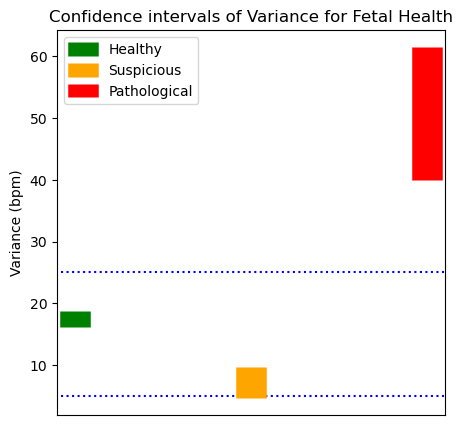

In [142]:
plt.figure(figsize=(5, 5))
#y = 5
#x = fetal
plt.axhline(y=5, xmin = 0.01, color = "blue", linestyle = "dotted")
plt.axhline(y=25, xmin = 0.01, color = "blue", linestyle = "dotted")

plt.errorbar(x=0, y=mean_variability_1, yerr=(variability_interval_1[1]-mean_variability_1), fmt='o', color= "green", elinewidth = 22, label='Healthy')
plt.errorbar(x=1, y=mean_variability_2, yerr=(variability_interval_2[1]-mean_variability_2), fmt='o', color = "orange", elinewidth = 22, label='Suspicious')
plt.errorbar(x=2, y=mean_variability_3, yerr=(variability_interval_3[1]-mean_variability_3), fmt='o', color = "red", elinewidth = 22, label='Pathological')
plt.xticks([])
plt.ylabel('Variance (bpm)')
plt.title('Confidence intervals of Variance for Fetal Health')

plt.legend(loc='upper left')
plt.show()

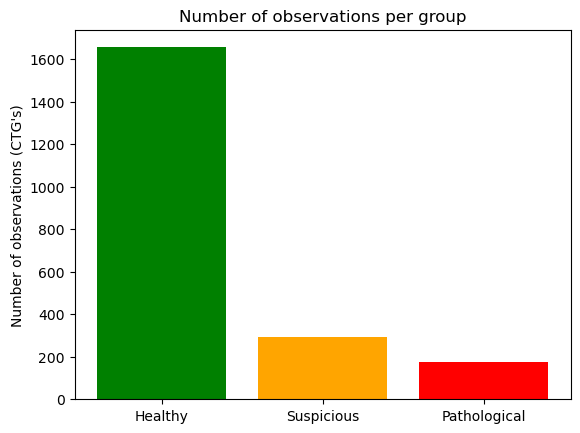

In [167]:
plt.bar("Healthy", len(fetal_movements_1),color = "green")
plt.bar("Suspicious", len(fetal_movements_2), color = "orange")
plt.bar("Pathological", len(fetal_movements_3), color = "red")
#plt.xlabel("Fetal Health Group")
plt.ylabel("Number of observations (CTG's)")
plt.title("Number of observations per group")
plt.show()

In [152]:
print(len(fetal_movements_1))
print(len(fetal_movements_2))
print(len(fetal_movements_3))

1655
295
176


In [151]:
## Fetal movementas and fetal healthy

fetal_movements_1 = fetal[fetal["fetal_health"] == 1]["fetal_movement"]

mean = fetal_movements_1.mean()
mean

0.007963141993957704

In [67]:
fetal_movements_3 = fetal[fetal["fetal_health"] == 3]["fetal_movement"]

mean = fetal_movements_3.mean()
mean


0.02567613636363636

In [ ]:
##   DO healthy babies have more movemnets than pathologoical babaies??

In [149]:
# H0: sick babies have =< fetal movements than healthy babies
# H1: sick babies have >fetal movements than healthy babies

alpha = 0.05

results = st.ttest_ind(fetal_movements_3, fetal_movements_1, equal_var = False, alternative = "greater")

results

Ttest_indResult(statistic=2.707244370904775, pvalue=0.003712474481164615)

In [82]:
p_value = results[1]
p_value

0.003712474481164615

In [83]:
if p_value > alpha:
    print("we CAN NOT reject the null hypothesis")
else:
    print("we CAN reject the null hypothesis")

we CAN reject the null hypothesis


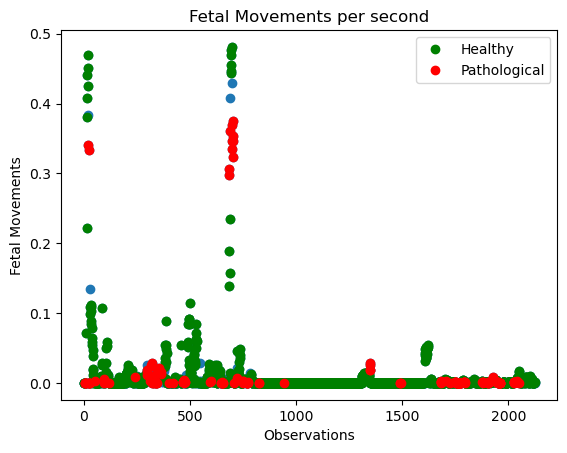

In [144]:


### plotting fetal movements/fetal health

plt.plot(fetal["fetal_movement"], "o")
plt.plot(fetal[fetal["fetal_health"]==1]["fetal_movement"], "o", color = "green", label= "Healthy")
#plt.plot(fetal[fetal["fetal_health"]==2]["baseline value"], "o", color = "orange", label = "Suspicious")
plt.plot(fetal[fetal["fetal_health"]==3]["fetal_movement"], "o", color = "red", label= "Pathological")
plt.title("Fetal Movements per second")
plt.xlabel("Observations")
plt.ylabel("Fetal Movements")
plt.legend(loc='upper right')
plt.show()

In [143]:
## from our sample, are fetal movementes related to fetal health?

results_attempt = st.ttest_ind(fetal_movements_3, fetal_movements_1, equal_var = False)

results_attempt

Ttest_indResult(statistic=2.707244370904775, pvalue=0.00742494896232923)

In [ ]:
st.ttest_ind(ab_test["a"], ab_test["b"], equal_var = False)

In [148]:
# just curiosity about suspicious CTG's

fetal_movements_2 = fetal[fetal["fetal_health"] == 2]["fetal_movement"]
fetal_movements_2.mean()

0.00833220338983051